![Screenshot 2023-07-17 220104.png](<attachment:Screenshot 2023-07-17 220104.png>)
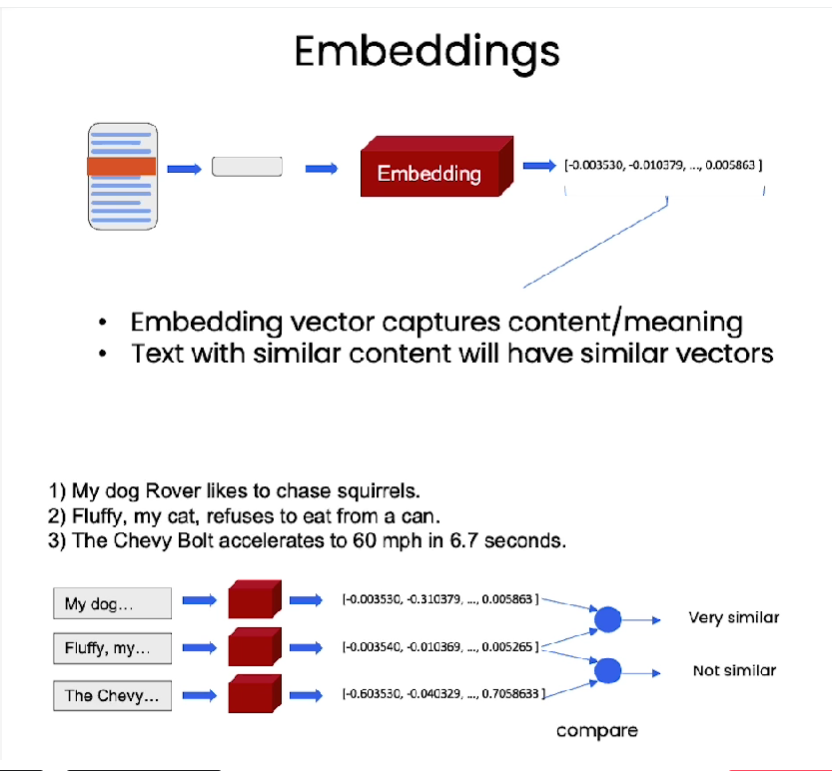

In [51]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [52]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

In [53]:
file = 'Data.csv'
loader = CSVLoader(file_path=file)

In [56]:
from langchain.document_loaders import CSVLoader
loader=CSVLoader(file_path=file)

In [57]:
docs=loader.load()

In [58]:
docs[0]

Document(page_content='Product: Queen Size Sheet Set\nReview: I ordered a king size set. My only criticism would be that I wish seller would offer the king size set with 4 pillowcases. I separately ordered a two pack of pillowcases so I could have a total of four. When I saw the two packages, it looked like the color did not exactly match. Customer service was excellent about sending me two more pillowcases so I would have four that matched. Excellent! For the cost of these sheets, I am satisfied with the characteristics and coolness of the sheets.', metadata={'source': 'Data.csv', 'row': 0})

In [13]:
from langchain.embeddings import OpenAIEmbeddings
embeddings= OpenAIEmbeddings()  

In [18]:
embed= embeddings.embed_query('Hello')

In [19]:
print(len(embed))

1536


In [43]:
print(embed[:10])

[-0.021834855899214745, -0.0071440632455050945, -0.02834244817495346, -0.024562587961554527, -0.023562420159578323, 0.02883603796362877, -0.012300778180360794, -0.0028868510853499174, -0.008306597359478474, -0.005452219396829605]


In [21]:
db= DocArrayInMemorySearch.from_documents(
    docs,embeddings
)

In [45]:
db

In [59]:
query='Tell about the products that we have'

In [60]:
docs= db.similarity_search(query)

In [61]:
list(docs)

[Document(page_content='Product: Hervidor de Agua ElÃ©ctrico\nReview: EstÃ¡ lu bonita calienta muy rÃ¡pido, es muy funcional, solo falta ver cuÃ¡nto dura, solo llevo 3 dÃ\xadas en funcionamiento.', metadata={'source': 'Data.csv', 'row': 6}),
 Document(page_content='Product: Pillows Insert\nReview: This is the best throw pillow fillers on Amazon. Iâ€™ve tried several others, and theyâ€™re all cheap and flat no matter how much fluffing you do. Once you toss these in the dryer after you remove them from the vacuum sealed shipping material, they fluff up great', metadata={'source': 'Data.csv', 'row': 3}),
 Document(page_content="Product: Luxury Air Mattress\nReview: This mattress had a small hole in the top of it (took forever to find where it was), and the patches that they provide did not work, maybe because it's the top of the mattress where it's kind of like fabric and a patch won't stick. Maybe I got unlucky with a defective mattress, but where's quality assurance for this company? Th

In [62]:
retriever= db.as_retriever()

In [63]:
retriever

VectorStoreRetriever(tags=None, metadata=None, vectorstore=<langchain.vectorstores.docarray.in_memory.DocArrayInMemorySearch object at 0x00000277059342B0>, search_type='similarity', search_kwargs={})

In [64]:
llm= ChatOpenAI(temperature=0.0)

In [65]:
qdocs="".join([docs[i].page_content for i in range(len(docs))])

In [66]:
response = llm.call_as_llm(f"{qdocs} Question: Please summarize all the reviews and tell how the customers\
                           feeling about our products in general.") 


In [67]:
display(Markdown(response))

Overall, the customers have mixed feelings about the products. The electric water kettle is praised for its fast heating and functionality, but its durability is yet to be determined. The pillow inserts are highly regarded as the best on Amazon, with customers appreciating their fluffiness after being fluffed in the dryer. However, the luxury air mattress received negative feedback due to a small hole that was difficult to patch, leading to a flat and unsatisfactory experience. Customers also expressed frustration with the company's return policy. The waterproof phone pouch received positive feedback for its waterproof capabilities, but there were concerns about the durability of the hard plastic opening and the inability to use the phone while inside the pouch. Overall, customers have a mixed opinion about the products, with some praising their functionality and quality, while others experienced issues and dissatisfaction.

In [34]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [35]:
query =  "rate the overall customer satisfaction in a scale of one to ten"

In [36]:
response = qa_stuff.run(query)



> Entering new RetrievalQA chain...

> Finished chain.


In [37]:
display(Markdown(response))

Based on the given reviews, it is difficult to determine an overall customer satisfaction rating on a scale of one to ten. The first review for the Queen Size Sheet Set seems to be positive, with the customer expressing satisfaction with the product and customer service. However, the second review for the Luxury Air Mattress is highly negative, indicating a poor experience with the product and the company's customer service. The third review for the Hervidor de Agua Eléctrico is in a different language and does not provide clear information about customer satisfaction. The fourth review for the L'Or Espresso Café is also negative, suggesting dissatisfaction with the taste and questioning the authenticity of the product. Therefore, without more information, it is not possible to provide an accurate overall customer satisfaction rating.

In [41]:
from langchain.indexes import VectorstoreIndexCreator

In [38]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

In [39]:
response = index.query(query, llm=llm)

In [40]:
display(Markdown(response))

For the Queen Size Sheet Set, the overall customer satisfaction seems to be high, as the customer mentioned being satisfied with the characteristics and coolness of the sheets. However, there was a minor issue with the pillowcase color matching, which was resolved by the excellent customer service. Based on this information, I would rate the overall customer satisfaction for the Queen Size Sheet Set at around 8 out of 10.

For the Luxury Air Mattress, the customer expressed a very negative experience due to a small hole in the mattress and the patches provided not working. The inconvenience of having to ship the mattress back for a refund also added to their dissatisfaction. Based on this review, I would rate the overall customer satisfaction for the Luxury Air Mattress at a low 2 out of 10.

For the Hervidor de Agua Eléctrico, the customer review is in a different language, and without understanding the content, it is difficult to determine the overall customer satisfaction. Therefore, I cannot provide a rating for this product.

For the L'Or Espresso Café, the customer expressed disappointment in the taste and foam quality of the coffee. They also questioned if the product was old or a counterfeit. Based on this review, I would rate the overall customer satisfaction for the L'Or Espresso Café at a low 3 out of 10.

![Screenshot 2023-07-17 234851.png](<attachment:Screenshot 2023-07-17 234851.png>)
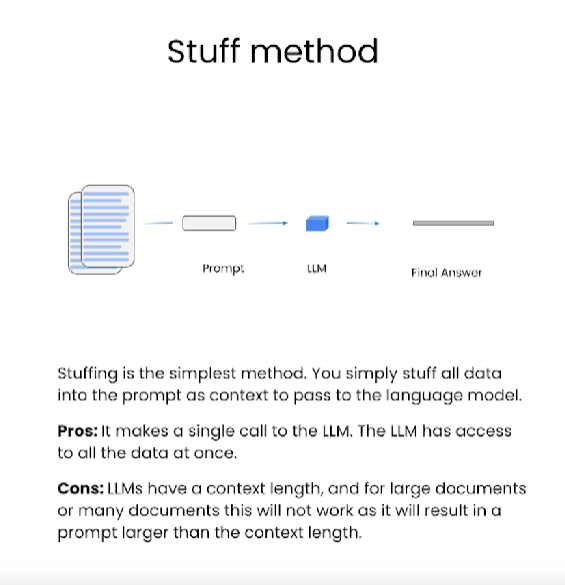